# _Network Graph Analysis with Python_

<img src='../data/dataset-cover.png'>

_Karmaşık sistemler, güç şebekesi, Dünya Çapında Ağ (WWW), beynin farklı bölgelerindeki aktiviteler veya bir topluluk içindeki insanlar gibi, bağlantıları üzerinden anlaşılabilir, incelenebilir ve görselleştirilebilir. Bu makalede, Python ile network graph (ağ grafiği) analizi üzerine bir veri bilimi projesi tanıtılacaktır._

## _Import_

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Input data files check
from subprocess import check_output

import warnings
warnings.filterwarnings('ignore')

## _Networkx_

_**NetworkX**, Python’da **graf teorisi ve ağ analizleri** yapmak için kullanılan güçlü bir kütüphanedir._

- _Düğümler (nodes) ve kenarlar (edges) oluşturup **sosyal ağlar, yol haritaları, bağlantı grafikleri** gibi yapıları görselleştirebilirsiniz._

- _Algoritmalar: Kısa yol bulma, merkeziyet ölçümleri, topluluk tespiti gibi analizler yapılabilir._

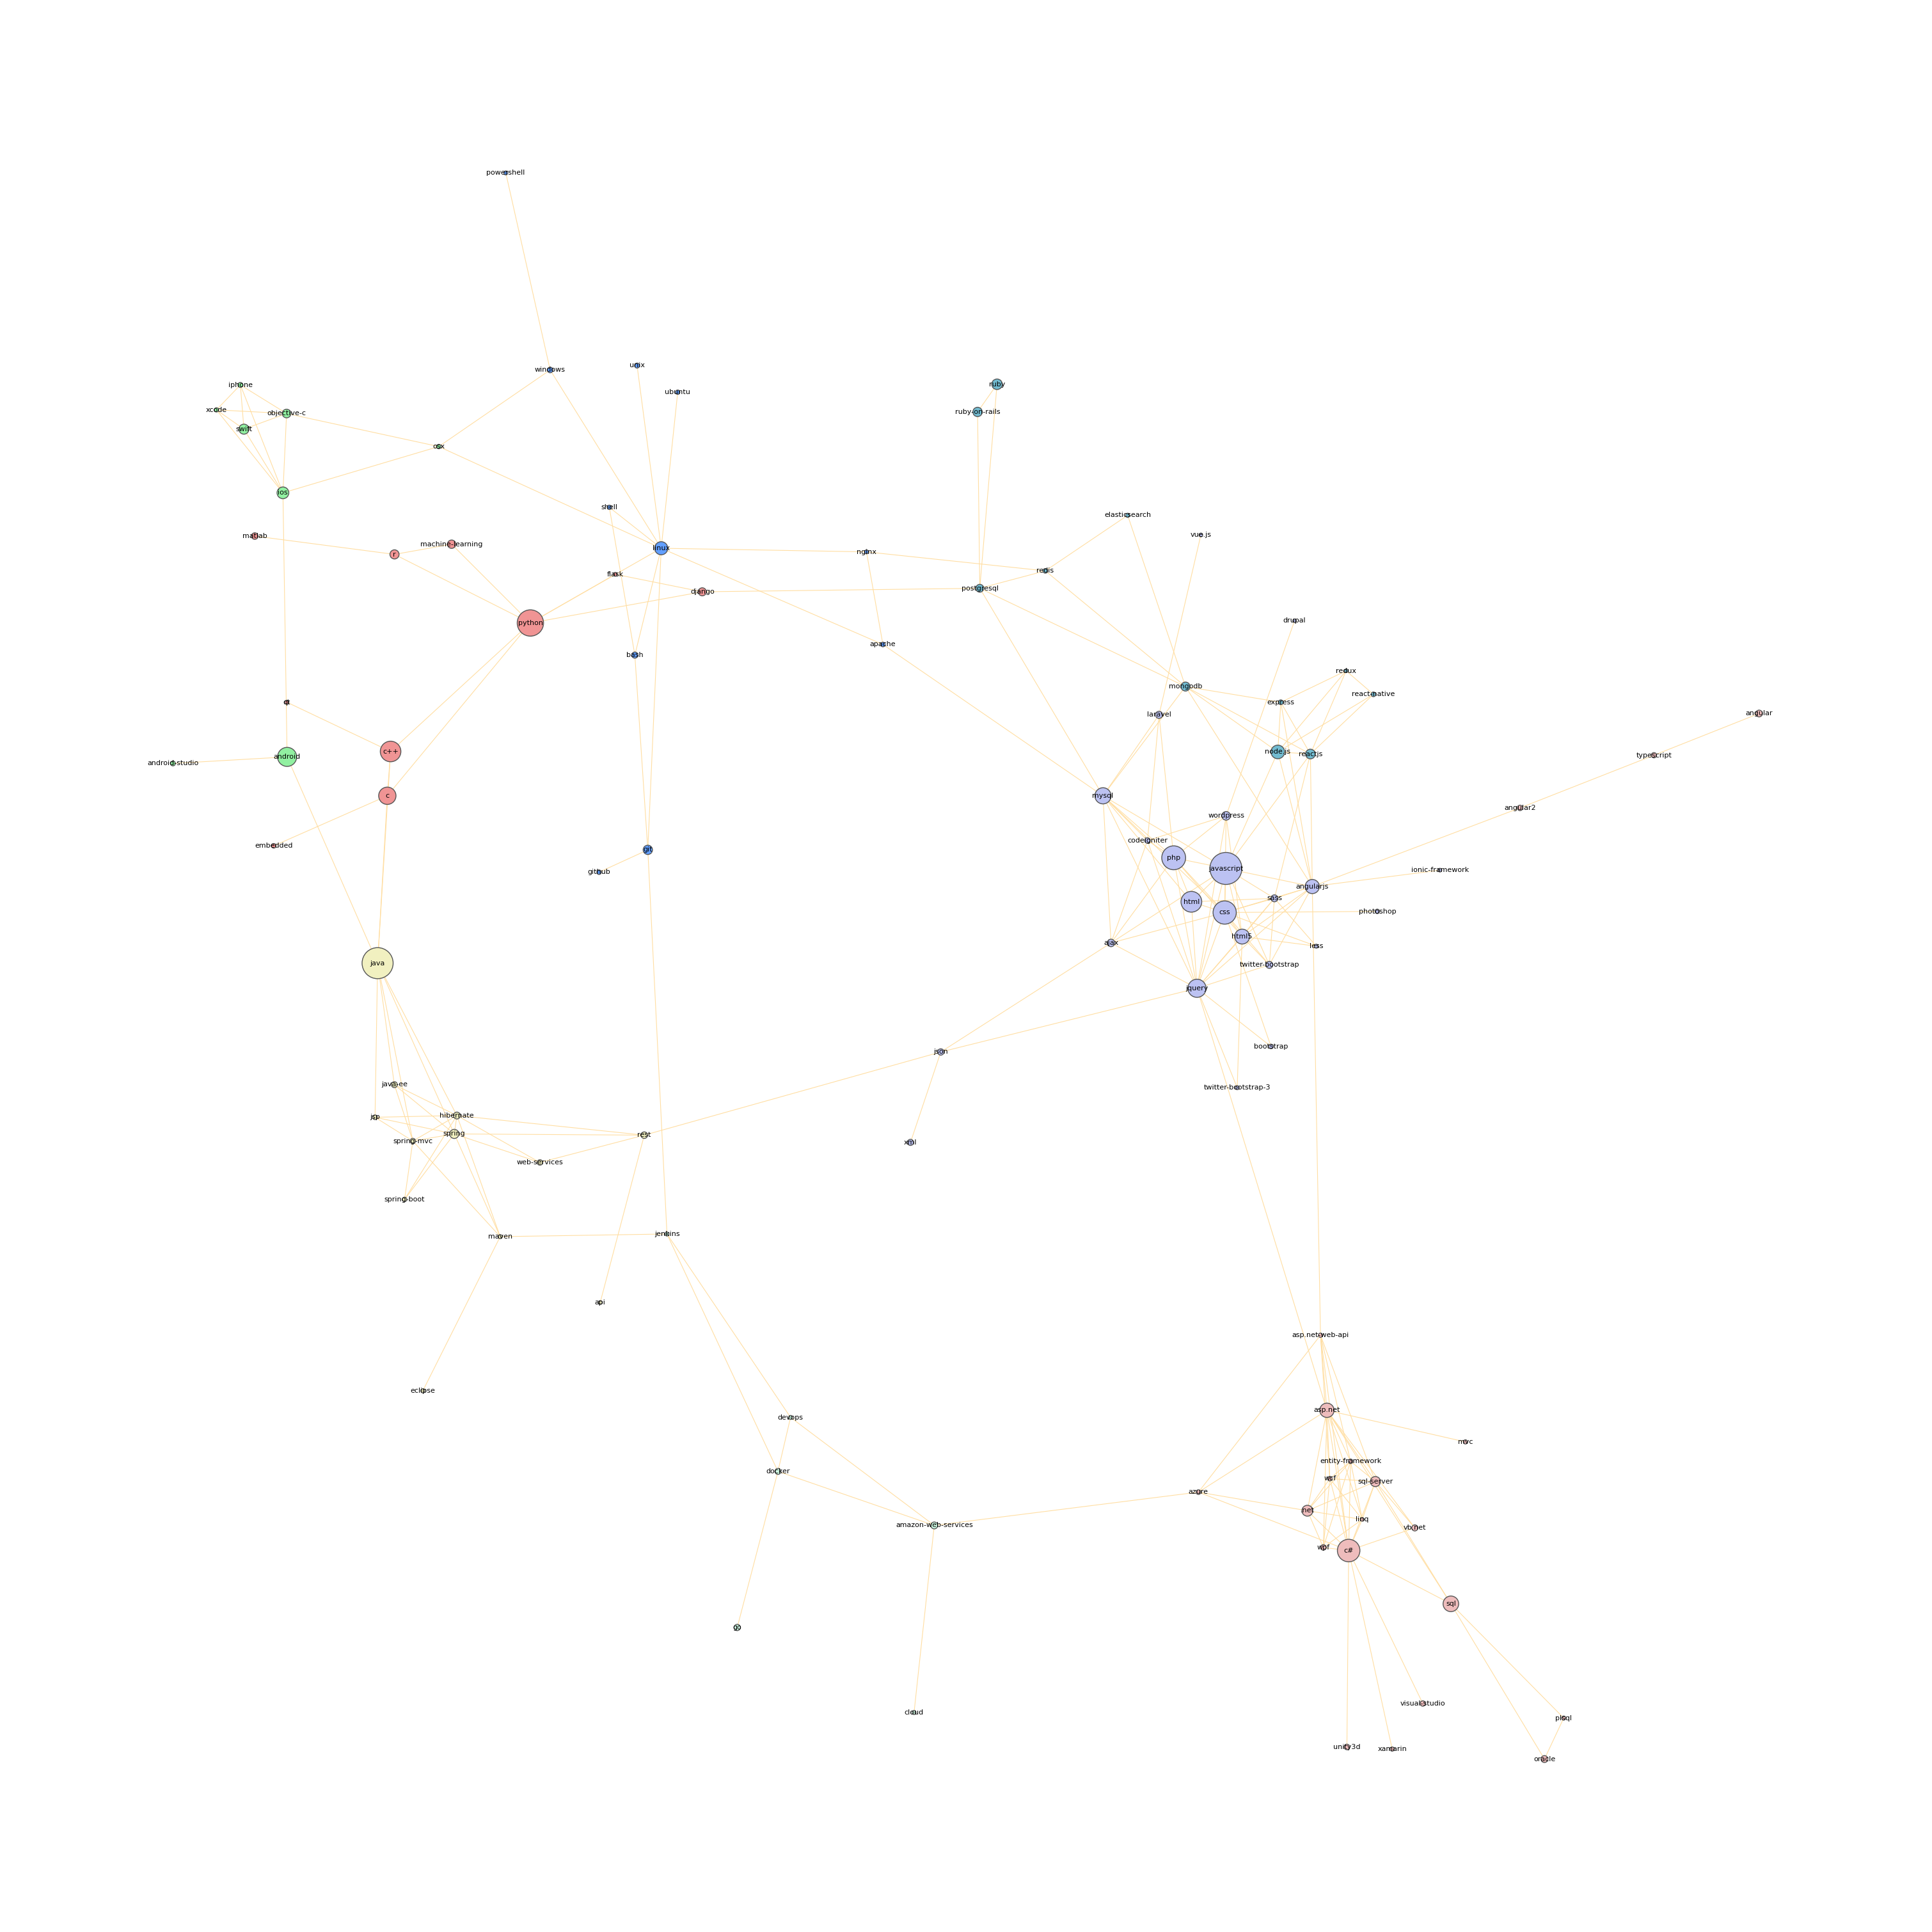

In [45]:
# Boş bir graph oluşturuyoruz, 'day' adında bir attribute ekliyoruz
G = nx.Graph(day="Stackoverflow")

# Node ve edge verilerini CSV'den okuyoruz
df_nodes = pd.read_csv('../data/stack_network_nodes.csv')
df_edges = pd.read_csv('../data/stack_network_links.csv')

# Node'ları graph'a ekliyoruz, her node için 'group' ve 'nodesize' bilgilerini attribute olarak saklıyoruz
for _, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])

# Edge'leri graph'a ekliyoruz, her edge için 'value' attribute'unu ağırlık olarak kullanıyoruz
for _, row in df_edges.iterrows():
    G.add_weighted_edges_from([
        (row['source'], row['target'], row['value'])
    ])

# OUTLIER TEMİZLİĞİ
# En büyük bağlı bileşeni alıyoruz ve sadece onu kullanıyoruz
# Böylece izolasyona düşmüş node'lar grafikten temizlenmiş oluyor
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Her group için renk haritası oluşturuyoruz
color_map = {
    1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff',
    6:'#bcc2f2', 7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6',
    11:'#ffdf55', 12:'#ef77aa', 13:'#d6dcff', 14:'#d2f5f0'
}

# Grafik boyutu
plt.figure(figsize=(30,30))

# Node renklerini ve boyutlarını belirliyoruz
colors = [color_map[G.nodes[n]['group']] for n in G]
sizes = [G.nodes[n]['nodesize'] * 2 for n in G]  # boyutu ölçeklendiriyoruz

# Spring layout için optimal k değerini hesaplıyoruz
k = 1 / np.sqrt(len(G.nodes()))

# Node'ları pozisyonlandırıyoruz
pos = nx.spring_layout(
    G,
    k=k * 2,          # node'lar arası mesafeyi ayarlıyor
    iterations=200,   # iterasyon sayısı, grafiğin dengeli yerleşmesi için
    seed=4            # tekrarlanabilir sonuç için random seed
)

# Grafiği çiziyoruz
nx.draw(
    G,
    pos=pos,
    node_color=colors,
    node_size=sizes,
    edge_color='#FFDEA2',   # kenar rengi
    width=0.8,              # kenar kalınlığı
    with_labels=True,       # node isimlerini göster
    font_size=8             # label font boyutu
)

# Node kenar renklerini değiştirme
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")

# Grafiği yüksek çözünürlükte kaydet
plt.savefig("stackoverflow_network_clean.png", dpi=300, bbox_inches='tight')

# Grafiği göster
plt.show()

_Bu çalışma, Stack Overflow etiketleri arasındaki ilişkileri ağ analizi yaklaşımıyla incelemeyi amaçlamaktadır. Oluşturulan grafikte outlier düğümler elenmiş ve merkezi teknolojiler arasındaki bağlantılar görsel olarak ortaya konmuştur._